In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,age,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),...,positions_LB,positions_LM,positions_LW,positions_LWB,positions_RB,positions_RM,positions_RW,positions_RWB,positions_ST,height_cm
0,27,76.2,25,88,89,69500000.0,205000.0,1,3,5,...,0,0,0,0,0,1,0,0,0,175.26
1,25,83.9,32,88,91,73000000.0,255000.0,1,4,4,...,0,0,0,0,0,0,0,0,0,190.50
2,27,59.0,47,88,88,62000000.0,165000.0,1,3,4,...,0,0,1,0,0,0,0,0,1,162.56
3,27,88.9,72,88,91,60000000.0,135000.0,1,3,3,...,0,0,0,0,0,0,0,0,0,187.96
4,27,92.1,57,88,90,59500000.0,215000.0,1,3,3,...,0,0,0,0,0,0,0,0,0,193.04


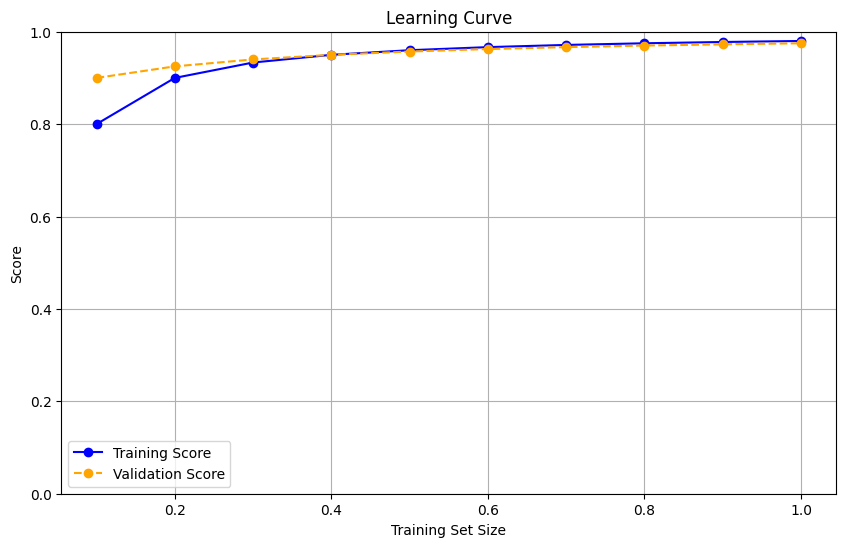

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data to simulate a learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = [1 - 0.2/i for i in range(1, 11)]  # hypothetical high performance on train set
valid_scores = [1 - 0.3/(i + 2) for i in range(1, 11)]  # hypothetical validation scores

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Training Score", marker='o', linestyle='-', color='blue')
plt.plot(train_sizes, valid_scores, label="Validation Score", marker='o', linestyle='--', color='orange')

# Labeling the plot
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

# Bước 1: Tạo tập dữ liệu giả lập
data = {
    "Quận": ["A", "B", "C", "A", "B"],
    "Loại nhà": ["Chung cư", "Nhà phố", "Chung cư", "Nhà phố", "Chung cư"],
    "Diện tích": [50, 80, 60, 100, 70],
    "Giá": [150000, 300000, 200000, 350000, 250000]
}
df = pd.DataFrame(data)

# Bước 2: One-Hot Encoding với Sparse Matrix
encoder = OneHotEncoder()  # Kết quả sẽ là sparse matrix
encoded_features = encoder.fit_transform(df[["Quận", "Loại nhà"]])

# Lấy cột "Diện tích" và chuyển thành sparse matrix
area = df[["Diện tích"]].values
area_sparse = hstack([encoded_features, area])
print(area_sparse)
# Đặt biến mục tiêu
target = df["Giá"]

# Bước 3: Huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(area_sparse, target)

# Kiểm tra hệ số hồi quy và hệ số chặn
coef = model.coef_
intercept = model.intercept_

coef, intercept


<COOrdinate sparse matrix of dtype 'float64'
	with 15 stored elements and shape (5, 6)>
  Coords	Values
  (0, 0)	1.0
  (0, 3)	1.0
  (1, 1)	1.0
  (1, 4)	1.0
  (2, 2)	1.0
  (2, 3)	1.0
  (3, 0)	1.0
  (3, 4)	1.0
  (4, 1)	1.0
  (4, 3)	1.0
  (0, 5)	50.0
  (1, 5)	80.0
  (2, 5)	60.0
  (3, 5)	100.0
  (4, 5)	70.0


(array([-1.25000000e+04,  1.25000000e+04, -7.44071258e-08, -6.25000000e+03,
         6.25000000e+03,  3.75000001e+03]),
 np.float64(-18750.00065911078))